In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [45]:
def data_gen():
    t = data_gen.t
    cnt = 0
    while cnt < 1000:
        cnt += 1
        t += 0.05
        yield t, np.sin(2*np.pi*t)*np.exp(-t/10.)

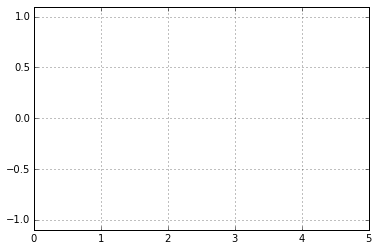

In [46]:
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(0, 5)
ax.grid()
xdata, ydata = [], []
def run(data):
    # update the data
    t,y = data
    xdata.append(t)
    ydata.append(y)
    xmin, xmax = ax.get_xlim()
    if t >= xmax:
        ax.set_xlim(xmin, 2*xmax)
        ax.figure.canvas.draw()
        line.set_data(xdata, ydata)
        return line,
    ani = animation.FuncAnimation(fig, run, data_gen, blit=True, interval=10,repeat=False)
    plt.show()  
    

In [47]:
# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

In [48]:
%matplotlib inline
from numpy import sin, cos, pi, array
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

In [49]:
G =  9.8 # acceleration due to gravity, in m/s^2
L1 = 1.0 # length of pendulum 1 in m
L2 = 1.0 # length of pendulum 2 in m
M1 = 1.0 # mass of pendulum 1 in kg
M2 = 1.0 # mass of pendulum 2 in kg

In [50]:
def derivs(state, t):
    dydx = np.zeros_like(state)
    dydx[0] = state[1]
    del_ = state[2]-state[0]
    den1 = (M1+M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_)
               + M2*G*sin(state[2])*cos(del_) + M2*L2*state[3]*state[3]*sin(del_)
               - (M1+M2)*G*sin(state[0]))/den1
    dydx[2] = state[3]
    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_)
               + (M1+M2)*G*sin(state[0])*cos(del_)
               - (M1+M2)*L1*state[1]*state[1]*sin(del_)
               - (M1+M2)*G*sin(state[2]))/den2
    return dydx

In [51]:
# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

In [52]:
# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

In [53]:
rad = pi/180

In [54]:
# initial state
state = np.array([th1, w1, th2, w2])*pi/180.

In [55]:
# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

In [56]:
x1 = L1*sin(y[:,0])
y1 = -L1*cos(y[:,0])

In [57]:
x2 = L2*sin(y[:,2]) + x1
y2 = -L2*cos(y[:,2]) + y1

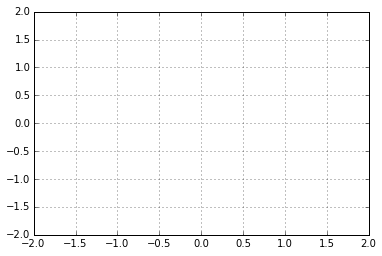

In [58]:
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template%(i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)), interval=25, blit=True, init_func=init)

#ani.save('double_pendulum.mp4', fps=15)
plt.show()

In [59]:
#!/usr/bin/env python
"""
An animated image
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

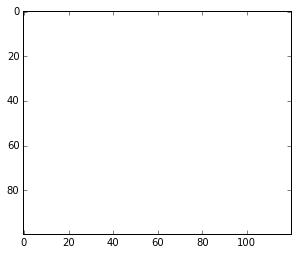

In [60]:
fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
# ims is a list of lists, each row is a list of artists to draw in the
# current frame; here we are just animating one artist, the image, in
# each frame

ims = []
for i in range(60):
    x += np.pi / 15.
    y += np.pi / 20.
    im = plt.imshow(f(x, y))
    ims.append([im])
    
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)

#ani.save('dynamic_images.mp4')
plt.show()

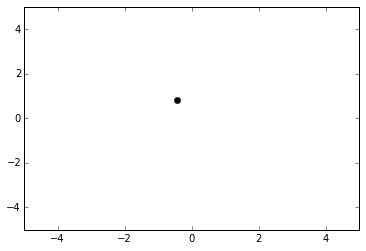

In [62]:
# This example uses a MovieWriter directly to grab individual frames and
# write them to a file. This avoids any event loop integration, but has
# the advantage of working with even the Agg backend. This is not recommended
# for use in an interactive setting.
# -*- noplot -*-
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as manimation

FFMpegWriter = manimation.writers['ffmpeg']

metadata = dict(title='Movie Test', artist='Matplotlib', comment='Movie support!')

writer = FFMpegWriter(fps=15, metadata=metadata)

fig = plt.figure()
l, = plt.plot([], [], 'k-o')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

x0,y0 = 0, 0

with writer.saving(fig, "writer_test.mp4", 100):
    for i in range(100):
        x0 += 0.1 * np.random.randn()
        y0 += 0.1 * np.random.randn()
        l.set_data(x0, y0)
        writer.grab_frame()

In [66]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

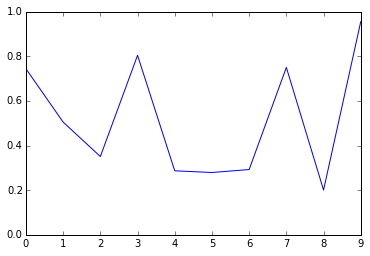

In [67]:
fig, ax = plt.subplots()
line, = ax.plot(np.random.rand(10))
ax.set_ylim(0, 1)

def update(data):
    line.set_ydata(data)
    return line,

def data_gen():
    while True: yield np.random.rand(10)
        
ani = animation.FuncAnimation(fig, update, data_gen, interval=100)
plt.show()

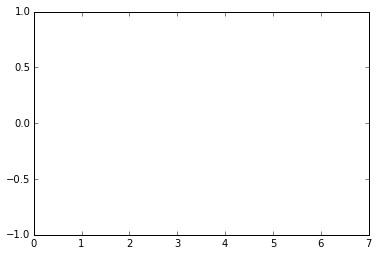

In [69]:
"""
A simple example of an animated plot
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)        # x-array
line, = ax.plot(x, np.sin(x))

def animate(i):
    line.set_ydata(np.sin(x+i/10.0))  # update the data
    return line,

#Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init, interval=25, blit=True)
plt.show()

In [74]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.animation as animation

# This example uses subclassing, but there is no reason that the proper function
# couldn't be set up and then use FuncAnimation. The code is long, but not
# really complex. The length is due solely to the fact that there are a total
# of 9 lines that need to be changed for the animation as well as 3 subplots
# that need initial set up.      
        

In [75]:
class SubplotAnimation(animation.TimedAnimation):
    def __init__(self):
        fig = plt.figure()
        ax1 = fig.add_subplot(1, 2, 1)
        ax2 = fig.add_subplot(2, 2, 2)
        ax3 = fig.add_subplot(2, 2, 4)
        
        self.t = np.linspace(0, 80, 400)
        self.x = np.cos(2 * np.pi * self.t / 10.)
        self.y = np.sin(2 * np.pi * self.t / 10.)
        self.z = 10 * self.t
        
        ax1.set_xlabel('x')
        ax1.set_ylabel('y')
        self.line1 = Line2D([], [], color='black')
        self.line1a = Line2D([], [], color='red', linewidth=2)
        self.line1e = Line2D([], [], color='red', marker='o', markeredgecolor='r')
        ax1.add_line(self.line1)
        ax1.add_line(self.line1a)
        ax1.add_line(self.line1e)
        ax1.set_xlim(-1, 1)
        ax1.set_ylim(-2, 2)
        ax1.set_aspect('equal', 'datalim')
        
        ax2.set_xlabel('y')
        ax2.set_ylabel('z')
        self.line2 = Line2D([], [], color='black')
        self.line2a = Line2D([], [], color='red', linewidth=2)
        self.line2e = Line2D([], [], color='red', marker='o', markeredgecolor='r')
        ax2.add_line(self.line2)
        ax2.add_line(self.line2a)
        ax2.add_line(self.line2e)
        ax2.set_xlim(-1, 1)
        ax2.set_ylim(0, 800)
        
        ax3.set_xlabel('x')
        ax3.set_ylabel('z')
        self.line3 = Line2D([], [], color='black')
        self.line3a = Line2D([], [], color='red', linewidth=2)
        self.line3e = Line2D([], [], color='red', marker='o', markeredgecolor='r')
        ax3.add_line(self.line3)
        ax3.add_line(self.line3a)
        ax3.add_line(self.line3e)
        ax3.set_xlim(-1, 1)
        ax3.set_ylim(0, 800)
        
        animation.TimedAnimation.__init__(self, fig, interval=50, blit=True)

In [76]:
def _draw_frame(self, framedata):
    i = framedata
    head = i - 1
    head_len = 10
    head_slice = (self.t > self.t[i] - 1.0) & (self.t < self.t[i])
    
    self.line1.set_data(self.x[:i], self.y[:i])
    self.line1a.set_data(self.x[head_slice], self.y[head_slice])
    self.line1e.set_data(self.x[head], self.y[head])
    
    self.line2.set_data(self.y[:i], self.z[:i])
    self.line2a.set_data(self.y[head_slice], self.z[head_slice])
    self.line2e.set_data(self.y[head], self.z[head])
    
    self.line3.set_data(self.x[:i], self.z[:i])
    self.line3a.set_data(self.x[head_slice], self.z[head_slice])
    self.line3e.set_data(self.x[head], self.z[head])
    
    self._drawn_artists = [self.line1, self.line1a, self.line1e,self.line2, self.line2a, self.line2e,self.line3, self.line3a, self.line3e]
    
    def new_frame_seq(self):
        return iter(range(self.t.size))
    
    def _init_draw(self):
        lines = [self.line1, self.line1a, self.line1e,self.line2, self.line2a, self.line2e, self.line3, self.line3a, self.line3e]
    
    for l in lines:
        l.set_data([], [])     

AttributeError: 'SubplotAnimation' object has no attribute '_framedata'

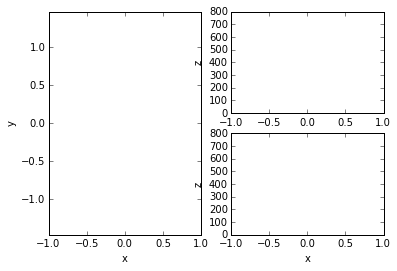

In [77]:
ani = SubplotAnimation()
#ani.save('test_sub.mp4')
plt.show()

In [81]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

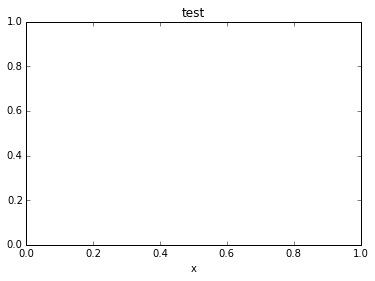

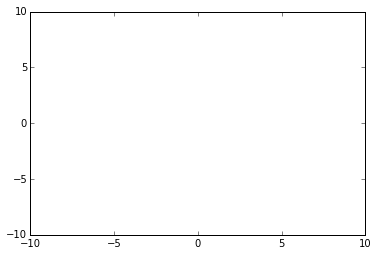

In [82]:
def update_line(num, data, line):
    line.set_data(data[...,:num])
    return line,

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l), interval=50, blit=True)
#line_ani.save('lines.mp4')

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))
    
im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000, blit=True)
#im_ani.save('im.mp4', metadata={'artist':'Guido'})
plt.show()


In [84]:
%matplotlib inline
# update a distribution based on new data.
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from matplotlib.animation import FuncAnimation

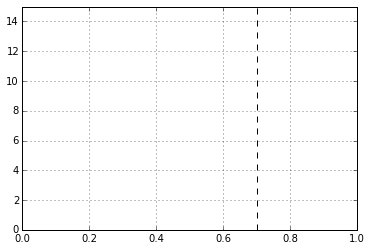

In [85]:
class UpdateDist(object):
    def __init__(self, ax, prob=0.5):
        self.success = 0
        self.prob = prob
        self.line, = ax.plot([], [], 'k-')
        self.x = np.linspace(0, 1, 200)
        self.ax = ax
        
        # Set up plot parameters
        self.ax.set_xlim(0, 1)
        self.ax.set_ylim(0, 15)
        self.ax.grid(True)
        
        # This vertical line represents the theoretical value, to
        # which the plotted distribution should converge.
        self.ax.axvline(prob, linestyle='--', color='black')
        
    def init(self):
        self.success = 0
        self.line.set_data([], [])
        return self.line,
    
    def __call__(self, i):
        # This way the plot can continuously run and we just keep
        # watching new realizations of the process
        if i == 0:
            return self.init()
        
        # Choose success based on exceed a threshold with a uniform pick
        if np.random.rand(1,) < self.prob:
            self.success += 1
            y = ss.beta.pdf(self.x, self.success + 1, (i - self.success) + 1)
            self.line.set_data(self.x, y)
            return self.line,

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ud = UpdateDist(ax, prob=0.7)
anim = FuncAnimation(fig, ud, frames=np.arange(100), init_func=ud.init, interval=100, blit=True)
plt.show()

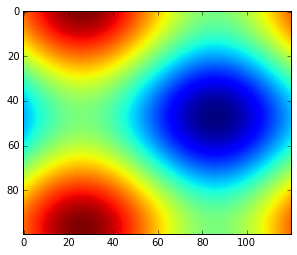

In [87]:
#!/usr/bin/env python
"""
An animated image
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig = plt.figure()

def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), cmap=plt.get_cmap('jet'))

def updatefig(*args):
    global x,y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x,y))
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()

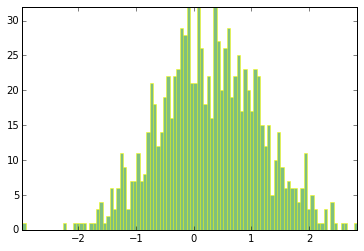

In [90]:
"""
This example shows how to use a path patch to draw a bunch of
rectangles for an animated histogram
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.path as path
import matplotlib.animation as animation

fig, ax = plt.subplots()

# histogram our data with numpy
data = np.random.randn(1000)
n, bins = np.histogram(data, 100)

# get the corners of the rectangles for the histogram
left = np.array(bins[:-1])
right = np.array(bins[1:])
bottom = np.zeros(len(left))
top = bottom + n
nrects = len(left)

# here comes the tricky part -- we have to set up the vertex and path
# codes arrays using moveto, lineto and closepoly

# for each rect: 1 for the MOVETO, 3 for the LINETO, 1 for the
# CLOSEPOLY; the vert for the closepoly is ignored but we still need
# it to keep the codes aligned with the vertices
nverts = nrects*(1+3+1)
verts = np.zeros((nverts, 2))
codes = np.ones(nverts, int) * path.Path.LINETO
codes[0::5] = path.Path.MOVETO
codes[4::5] = path.Path.CLOSEPOLY
verts[0::5,0] = left
verts[0::5,1] = bottom
verts[1::5,0] = left
verts[1::5,1] = top
verts[2::5,0] = right
verts[2::5,1] = top
verts[3::5,0] = right
verts[3::5,1] = bottom

barpath = path.Path(verts, codes)
patch = patches.PathPatch(barpath, facecolor='green', edgecolor='yellow', alpha=0.5)
ax.add_patch(patch)

ax.set_xlim(left[0], right[-1])
ax.set_ylim(bottom.min(), top.max())

def animate(i):
    # simulate new data coming in
    data = np.random.randn(1000)
    n, bins = np.histogram(data, 100)
    top = bottom + n
    verts[1::5,1] = top
    verts[2::5,1] = top
    
ani = animation.FuncAnimation(fig, animate, 100, repeat=False)
plt.show()

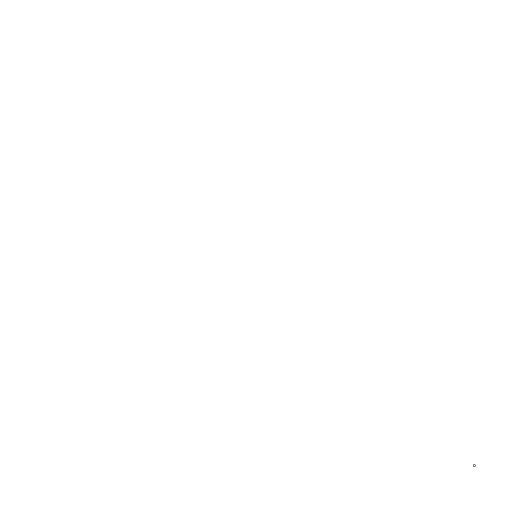

In [91]:
"""
Rain simulation

Simulates rain drops on a surface by animating the scale and opacity
of 50 scatter points.

Author: Nicolas P. Rougier
"""
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.animation import FuncAnimation

# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2), ('size',     float, 1), ('growth',   float, 1), ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:,0], rain_drops['position'][:,1],s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],facecolors='none')

def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops
    
    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:,3] = np.clip(rain_drops['color'][:,3], 0, 1)
    
    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']
    
    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)
    
    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])

# Construct the animation, using the update function as the animation
# director.
animation = FuncAnimation(fig, update, interval=10)
plt.show()

NameError: name 'update_lines' is not defined

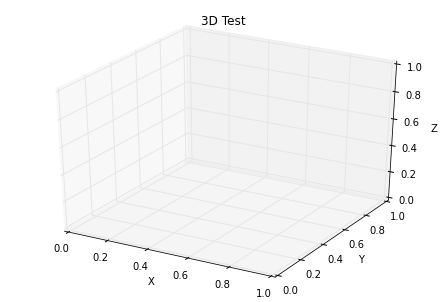

In [92]:
"""
A simple example of an animated plot... In 3D!
"""
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

def Gen_RandLine(length, dims=2) :
    """
    Create a line using a random walk algorithm
    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length) :
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index-1] + step
        return lineData
    
    def update_lines(num, dataLines, lines) :
        for line, data in zip(lines, dataLines) :
            # NOTE: there is no .set_data() for 3 dim data...
            line.set_data(data[0:2, :num])
            line.set_3d_properties(data[2,:num])
            return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines), interval=50, blit=False)

plt.show()

In [94]:
"""
Emulate an oscilloscope.  Requires the animation API introduced in
matplotlib 1.0 SVN.
"""
%matplotlib inline
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib.animation as animation

class Scope:
    def __init__(self, ax, maxt=2, dt=0.02):
        self.ax = ax
        self.dt = dt
        self.maxt = maxt
        self.tdata = [0]
        self.ydata = [0]
        self.line = Line2D(self.tdata, self.ydata)
        self.ax.add_line(self.line)
        self.ax.set_ylim(-.1, 1.1)
        self.ax.set_xlim(0, self.maxt)

    def update(self, y):
        lastt = self.tdata[-1]
        if lastt > self.tdata[0] + self.maxt: # reset the arrays
            self.tdata = [self.tdata[-1]]
            self.ydata = [self.ydata[-1]]
            self.ax.set_xlim(self.tdata[0], self.tdata[0] + self.maxt)
            self.ax.figure.canvas.draw()

        t = self.tdata[-1] + self.dt
        self.tdata.append(t)
        self.ydata.append(y)
        self.line.set_data(self.tdata, self.ydata)
        return self.line,

def emitter(p=0.03):
    'return a random value with probability p, else 0'
    while True:
        v = np.random.rand(1)
        if v > p:
            yield 0.
        else:
            yield np.random.rand(1)
            fig, ax = plt.subplots()
            scope = Scope(ax)
            
# pass a generator in "emitter" to produce data for the update func
ani = animation.FuncAnimation(fig, scope.update, emitter, interval=10,blit=True)

plt.show()

NameError: name 'scope' is not defined

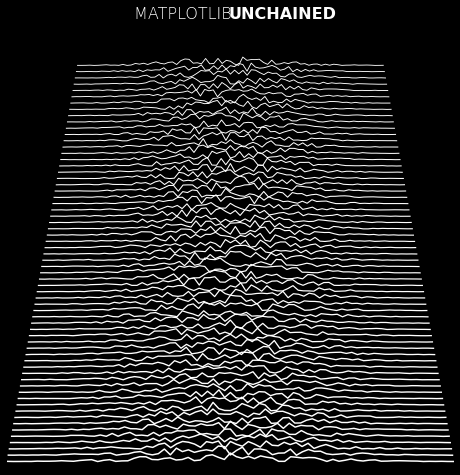

In [95]:
"""
Comparative path demonstration of frequency from a fake signal of a pulsar.
(mostly known because of the cover for Joy Division's Unknown Pleasures)

Author: Nicolas P. Rougier
"""
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Create new Figure with black background
fig = plt.figure(figsize=(8, 8), facecolor='black')

# Add a subplot with no frame
ax = plt.subplot(111, frameon=False)

# Generate random data
data = np.random.uniform(0, 1, (64, 75))
X = np.linspace(-1, 1, data.shape[-1])
G = 1.5 * np.exp(-4 * X * X)

# Generate line plots
lines = []
for i in range(len(data)):
    # Small reduction of the X extents to get a cheap perspective effect
    xscale = 1 - i / 200.
    # Same for linewidth (thicker strokes on bottom)
    lw = 1.5 - i / 100.0
    line, = ax.plot(xscale * X, i + G * data[i], color="w", lw=lw)
    lines.append(line)

# Set y limit (or first line is cropped because of thickness)
ax.set_ylim(-1, 70)

# No ticks
ax.set_xticks([])
ax.set_yticks([])

# 2 part titles to get different font weights
ax.text(0.5, 1.0, "MATPLOTLIB ", transform=ax.transAxes, ha="right", va="bottom", color="w", family="sans-serif", fontweight="light", fontsize=16)

ax.text(0.5, 1.0, "UNCHAINED", transform=ax.transAxes, ha="left", va="bottom", color="w", family="sans-serif", fontweight="bold", fontsize=16)

# Update function
def update(*args):
    # Shift all data to the right
    data[:, 1:] = data[:, :-1]
    # Fill-in new values
    data[:, 0] = np.random.uniform(0, 1, len(data))
    # Update data
    for i in range(len(data)):
        lines[i].set_ydata(i + G * data[i])
        # Return modified artists
        return lines

# Construct the animation, using the update function as the animation
# director.
anim = animation.FuncAnimation(fig, update, interval=10)
plt.show()

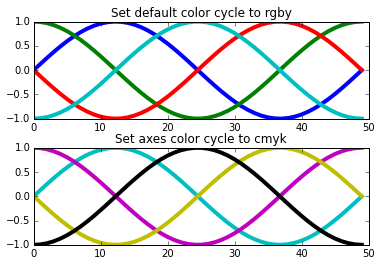

In [96]:
"""
Demo of custom color-cycle settings to control colors for multi-line plots.

This example demonstrates two different APIs:

    1. Setting the default rc-parameter specifying the color cycle.
       This affects all subsequent plots.
    2. Setting the color cycle for a specific axes. This only affects a single
       axes.
"""
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
offsets = np.linspace(0, 2*np.pi, 4, endpoint=False)
# Create array with shifted-sine curve along each column
yy = np.transpose([np.sin(x + phi) for phi in offsets])

plt.rc('lines', linewidth=4)
fig, (ax0, ax1)  = plt.subplots(nrows=2)

plt.rc('axes', color_cycle=['r', 'g', 'b', 'y'])
ax0.plot(yy)
ax0.set_title('Set default color cycle to rgby')

ax1.set_color_cycle(['c', 'm', 'y', 'k'])
ax1.plot(yy)
ax1.set_title('Set axes color cycle to cmyk')

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.3)
plt.show()

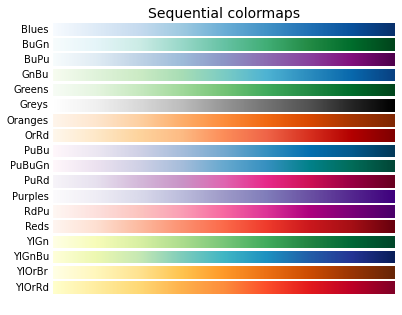

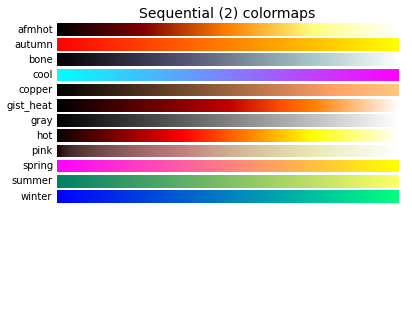

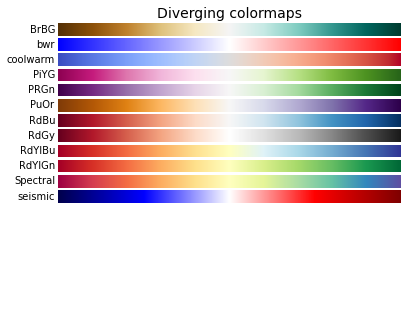

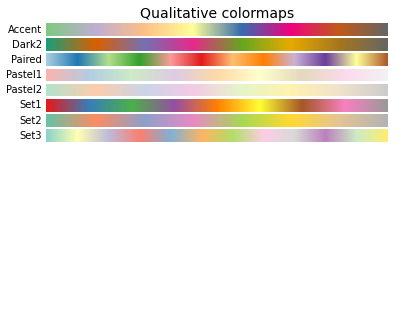

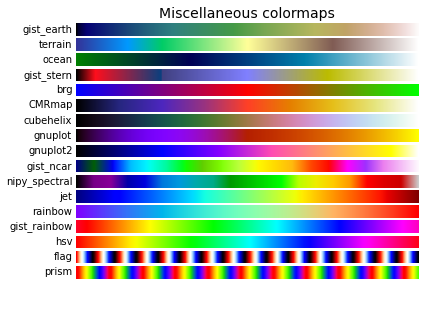

In [97]:
"""
Reference for colormaps included with Matplotlib.

This reference example shows all colormaps included with Matplotlib. Note that
any colormap listed here can be reversed by appending "_r" (e.g., "pink_r").
These colormaps are divided into the following categories:

Sequential:
    These colormaps are approximately monochromatic colormaps varying smoothly
    between two color tones---usually from low saturation (e.g. white) to high
    saturation (e.g. a bright blue). Sequential colormaps are ideal for
    representing most scientific data since they show a clear progression from
    low-to-high values.
Diverging:
    These colormaps have a median value (usually light in color) and vary
    smoothly to two different color tones at high and low values. Diverging
    colormaps are ideal when your data has a median value that is significant
    (e.g.  0, such that positive and negative values are represented by
    different colors of the colormap).
Qualitative:
    These colormaps vary rapidly in color. Qualitative colormaps are useful for
    choosing a set of discrete colors. For example::

        color_list = plt.cm.Set3(np.linspace(0, 1, 12))

    gives a list of RGB colors that are good for plotting a series of lines on
    a dark background.

Miscellaneous:
    Colormaps that don't fit into the categories above.
"""
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

cmaps = [('Sequential', ['Blues', 'BuGn', 'BuPu', 'GnBu', 'Greens', 'Greys', 'Oranges', 'OrRd','PuBu', 'PuBuGn', 'PuRd', 'Purples', 'RdPu','Reds', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd']),
         ('Sequential (2)', ['afmhot', 'autumn', 'bone', 'cool', 'copper','gist_heat', 'gray', 'hot', 'pink','spring', 'summer', 'winter']),
         ('Diverging',      ['BrBG', 'bwr', 'coolwarm', 'PiYG', 'PRGn', 'PuOr','RdBu', 'RdGy', 'RdYlBu', 'RdYlGn', 'Spectral','seismic']),
         ('Qualitative',    ['Accent', 'Dark2', 'Paired', 'Pastel1','Pastel2', 'Set1', 'Set2', 'Set3']),
         ('Miscellaneous',  ['gist_earth', 'terrain', 'ocean', 'gist_stern','brg', 'CMRmap', 'cubehelix','gnuplot', 'gnuplot2', 'gist_ncar','nipy_spectral', 'jet', 'rainbow','gist_rainbow', 'hsv', 'flag', 'prism'])]

nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps)
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

def plot_color_gradients(cmap_category, cmap_list):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)
    
    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)
    
        # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()

for cmap_category, cmap_list in cmaps:
    plot_color_gradients(cmap_category, cmap_list)

plt.show()  
    

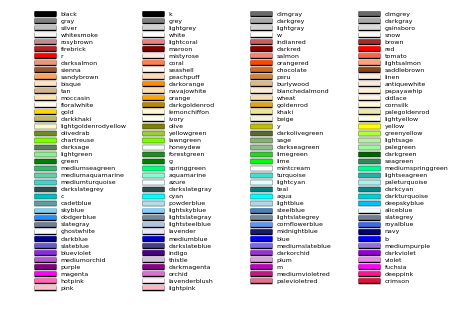

In [98]:
"""
Visualization of named colors.

Simple plot example with the named colors and its visual representation.
"""
%matplotlib inline

from __future__ import (absolute_import, division, print_function,unicode_literals)

import six

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

colors_ = list(six.iteritems(colors.cnames))

# Add the single letter colors.
for name, rgb in six.iteritems(colors.ColorConverter.colors):
    hex_ = colors.rgb2hex(rgb)
    colors_.append((name, hex_))

# Transform to hex color values.
hex_ = [color[1] for color in colors_]
# Get the rgb equivalent.
rgb = [colors.hex2color(color) for color in hex_]
# Get the hsv equivalent.
hsv = [colors.rgb_to_hsv(color) for color in rgb]

# Split the hsv values to sort.
hue = [color[0] for color in hsv]
sat = [color[1] for color in hsv]
val = [color[2] for color in hsv]

# Sort by hue, saturation and value.
ind = np.lexsort((val, sat, hue))
sorted_colors = [colors_[i] for i in ind]

n = len(sorted_colors)
ncols = 4
nrows = int(np.ceil(1. * n / ncols))

fig = plt.figure()
ax = fig.add_subplot(111)

X, Y = fig.get_dpi() * fig.get_size_inches()

# row height
h = Y / (nrows + 1)
# col width
w = X / ncols

for i, (name, color) in enumerate(sorted_colors):
    col = i % ncols
    row = int(i / ncols)
    y = Y - (row * h) - h
    
    xi_line = w * (col + 0.05)
    xf_line = w * (col + 0.25)
    xi_text = w * (col + 0.3)

    ax.text(xi_text,  y, name, fontsize=(h * 0.8),horizontalalignment='left',verticalalignment='center')

#     Add extra black line a little bit thicker to make
#     clear colors more visible.
    ax.hlines(y, xi_line, xf_line, color='black', linewidth=(h * 0.7))
    ax.hlines(y + h * 0.1, xi_line, xf_line, color=color, linewidth=(h * 0.6))

ax.set_xlim(0, X)
ax.set_ylim(0, Y)
ax.set_axis_off()

fig.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0, wspace=0)
plt.show()

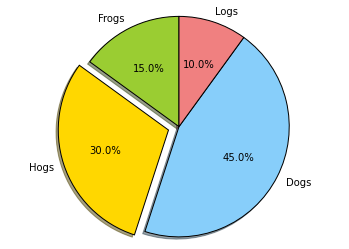

In [99]:
"""
Demo of a basic pie chart plus a few additional features.

In addition to the basic pie chart, this demo shows a few optional features:

    * slice labels
    * auto-labeling the percentage
    * offsetting a slice with "explode"
    * drop-shadow
    * custom start angle

Note about the custom start angle:

The default ``startangle`` is 0, which would start the "Frogs" slice on the
positive x-axis. This example sets ``startangle = 90`` such that everything is
rotated counter-clockwise by 90 degrees, and the frog slice starts on the
positive y-axis.
"""
import matplotlib.pyplot as plt


# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0) # only "explode" the 2nd slice (i.e. 'Hogs')

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')

plt.show()

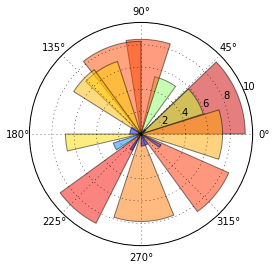

In [100]:
"""
Demo of bar plot on a polar axis.
"""
import numpy as np
import matplotlib.pyplot as plt


N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.jet(r / 10.))
    bar.set_alpha(0.5)

plt.show()

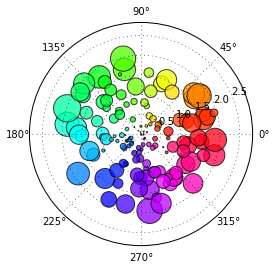

In [101]:
"""
Demo of scatter plot on a polar axis.

Size increases radially in this example and color increases with angle (just to
verify the symbols are being scattered correctly).
"""
import numpy as np
import matplotlib.pyplot as plt


N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2 * np.random.rand(N)
colors = theta

ax = plt.subplot(111, polar=True)
c = plt.scatter(theta, r, c=colors, s=area, cmap=plt.cm.hsv)
c.set_alpha(0.75)

plt.show()